### Comparative Analysis of Feature Selection Methods for Vitatrack Tasks

In this notebook we:
- Automatically construct file paths based on task names.
- Read merged results files from:
    - `/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/vitatrack/merged_results.tsv`
    - `/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/vitatrack_50_10/merged_results.tsv`
- Concatenate the results.
- Filter for specific feature selection methods (e.g., *hvg_svd*, *svd*, *svd_graph*).
- Compare performance metrics (R², rmse, mae, correlations) using pivot tables and bar charts.

*Note:* Adjust the column names if your file uses different labels (e.g., if the feature selection method column is named `"featsel"` instead of `"feature_selection"`).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# For a nicer DataFrame display (optional)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


In [2]:
tasks_of_interest = ["vitatrack", "vitatrack_50_10","vitatrack_100_20"]
base_path = "/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/"

# Initialize list for DataFrames
dfs = []

# Loop over tasks to build the file path and load the file
for task in tasks_of_interest:
    file_path = f"{base_path}{task}/merged_results.tsv"
    print(f"Loading file for task '{task}' from: {file_path}")
    
    # Load the merged results file (adjust separator if needed)
    df_task = pd.read_csv(file_path, sep="\t")
    
    # If the task column is missing, add it
    if "task" not in df_task.columns:
        df_task["task"] = task
    dfs.append(df_task)


Loading file for task 'vitatrack' from: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/vitatrack/merged_results.tsv
Loading file for task 'vitatrack_50_10' from: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/vitatrack_50_10/merged_results.tsv
Loading file for task 'vitatrack_100_20' from: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/vitatrack_100_20/merged_results.tsv


In [3]:
# Concatenate all task DataFrames into one
df = pd.concat(dfs, ignore_index=True)
print("Combined DataFrame shape:", df.shape)
display(df.head())


Combined DataFrame shape: (845, 10)


,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,4.573731,3.406120,-1.637250,0.641743,0.739255,vitatrack,ridge,hvg,{'alpha': 1.0},4ab9d83892
1,6.697584,4.902591,-4.621877,0.484215,0.620087,vitatrack,ridge,hvg,{'alpha': 0.1},21a5b4d24f
2,2.862280,2.125044,-0.045591,0.825251,0.888580,vitatrack,ridge,hvg,{'alpha': 100.0},c2d97443b9
3,8.774572,6.340537,-8.613341,0.383635,0.539464,vitatrack,ridge,hvg,{'alpha': 0.01},fbcbf2ca40
4,2.778392,2.066281,0.014381,0.835452,0.897022,vitatrack,ridge,hvg,{'alpha': 200.0},188cf28d18


## 2. Filter for the Selected Feature Selection Methods

We keep only the rows corresponding to the four methods of interest:  
- **hvg_svd**  
- **hvg_svd_graph**  
- **svd**  
- **svd_graph**  

Adjust the column name if needed (it may be labeled `"featsel"` or `"feature_selection"`).


In [4]:
# List of feature selection methods we want to compare
methods_of_interest = ["hvg_svd", "hvg_svd_graph", "svd", "svd_graph"]

# Determine the column name for feature selection method
if "feature_selection" in df.columns:
    fs_col = "feature_selection"
elif "featsel" in df.columns:
    fs_col = "featsel"
else:
    raise ValueError("Cannot find the feature selection column. Update the column name accordingly.")

# Filter to keep only the rows for these methods
df_filtered = df[df[fs_col].isin(methods_of_interest)]
print("After filtering for selected feature selection methods, shape:", df_filtered.shape)
display(df_filtered.head())

After filtering for selected feature selection methods, shape: (780, 10)


,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
9,2.836852,2.122748,-0.041858,0.827712,0.889151,vitatrack,ridge,hvg_svd,{'alpha': 1.0},2e0c7cb919
10,2.837168,2.122981,-0.042098,0.827672,0.889113,vitatrack,ridge,hvg_svd,{'alpha': 0.1},87035beb50
11,2.809137,2.103003,-0.020787,0.831203,0.892437,vitatrack,ridge,hvg_svd,{'alpha': 100.0},766cb8d86d
12,2.837200,2.123005,-0.042122,0.827668,0.889109,vitatrack,ridge,hvg_svd,{'alpha': 0.01},35867d3a19
13,2.790440,2.090697,-0.006500,0.833552,0.894648,vitatrack,ridge,hvg_svd,{'alpha': 200.0},63928827b9


In [5]:
df_filtered["hash"].unique

<bound method Series.unique of 9      2e0c7cb919
10     87035beb50
11     766cb8d86d
12     35867d3a19
13     63928827b9
          ...    
840    474fab76e3
841    2681a181fd
842    edcfc135e8
843    9c547f9306
844    c4fe0df089
Name: hash, Length: 780, dtype: object>

## 3. Compare Performance Metrics Across Tasks

For each performance metric (R², rmse, mae, correlations), we create a pivot table so that:
- Rows are the feature selection methods.
- Columns are the tasks (`vitatrack` vs. `vitatrack_50_10`).

We then compute the difference (e.g. "vitatrack_50_10" value minus "vitatrack" value) for each fs method.

This gives a direct comparison—say for *hvg_svd*—of the performance when using different numbers of components.


In [6]:
df_filtered

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
9,2.836852,2.122748,-0.041858,0.827712,0.889151,vitatrack,ridge,hvg_svd,{'alpha': 1.0},2e0c7cb919
10,2.837168,2.122981,-0.042098,0.827672,0.889113,vitatrack,ridge,hvg_svd,{'alpha': 0.1},87035beb50
11,2.809137,2.103003,-0.020787,0.831203,0.892437,vitatrack,ridge,hvg_svd,{'alpha': 100.0},766cb8d86d
12,2.837200,2.123005,-0.042122,0.827668,0.889109,vitatrack,ridge,hvg_svd,{'alpha': 0.01},35867d3a19
13,2.790440,2.090697,-0.006500,0.833552,0.894648,vitatrack,ridge,hvg_svd,{'alpha': 200.0},63928827b9
...,...,...,...,...,...,...,...,...,...,...
840,4.285850,3.306701,-21.890707,0.763147,0.795074,vitatrack_100_20,gnn,svd_graph,"{'hidden_dim': 896, 'lr': 0.0001, 'epochs': 40...",474fab76e3
841,4.235915,3.206373,-19.126842,0.748082,0.784505,vitatrack_100_20,gnn,svd_graph,"{'hidden_dim': 640, 'lr': 0.0003, 'epochs': 27...",2681a181fd
842,4.541783,3.704916,-32.637936,0.760628,0.805683,vitatrack_100_20,gnn,svd_graph,"{'hidden_dim': 512, 'lr': 0.0002, 'epochs': 25...",edcfc135e8
843,4.518802,3.540626,-28.342964,0.743941,0.781513,vitatrack_100_20,gnn,svd_graph,"{'hidden_dim': 1024, 'lr': 0.00012, 'epochs': ...",9c547f9306



Pivot Table for rmse:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         3.246548          3.228349         3.191940
hvg_svd_graph   3.324444          3.546879         3.448809
svd             3.105657          3.196284         3.184154
svd_graph       3.326741          3.501385         3.474542


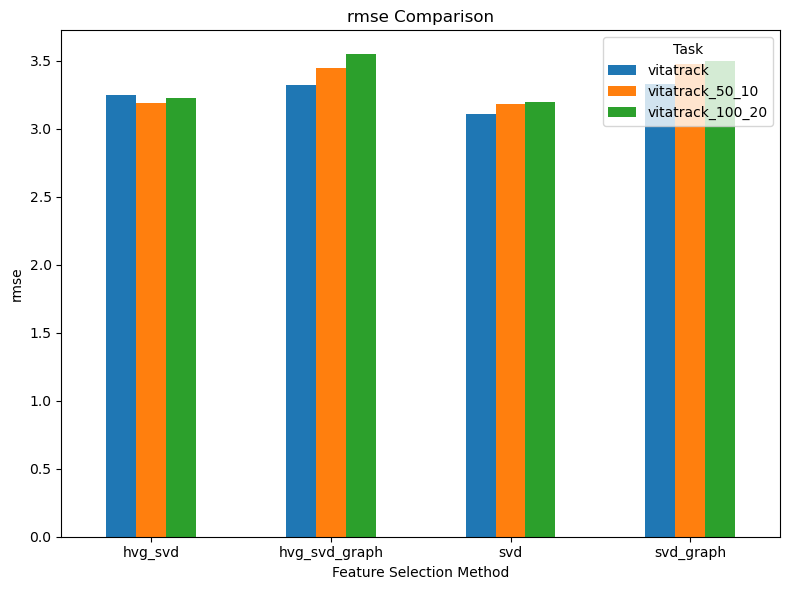


Difference (vitatrack_50_10 - vitatrack) for rmse:
task           vitatrack_50_10_minus_vitatrack
featsel                                       
hvg_svd                              -0.054608
hvg_svd_graph                         0.124364
svd                                   0.078497
svd_graph                             0.147802


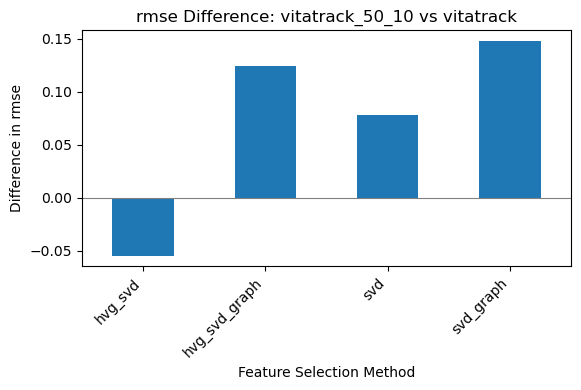


Difference (vitatrack_100_20 - vitatrack) for rmse:
task           vitatrack_100_20_minus_vitatrack
featsel                                        
hvg_svd                               -0.018199
hvg_svd_graph                          0.222434
svd                                    0.090626
svd_graph                              0.174644


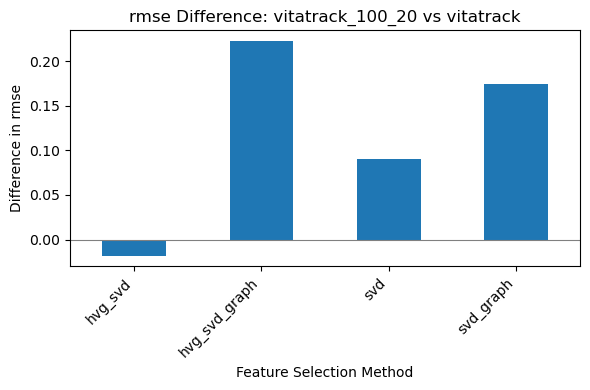


Pivot Table for mae:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         2.357430          2.346768         2.314549
hvg_svd_graph   2.472309          2.713179         2.627639
svd             2.237845          2.320656         2.301567
svd_graph       2.484704          2.676623         2.631460


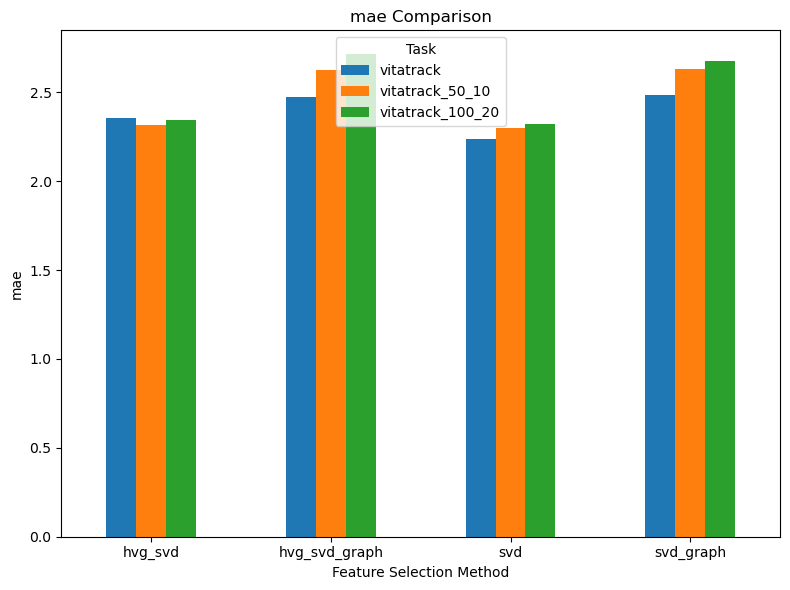


Difference (vitatrack_50_10 - vitatrack) for mae:
task           vitatrack_50_10_minus_vitatrack
featsel                                       
hvg_svd                              -0.042881
hvg_svd_graph                         0.155330
svd                                   0.063722
svd_graph                             0.146756


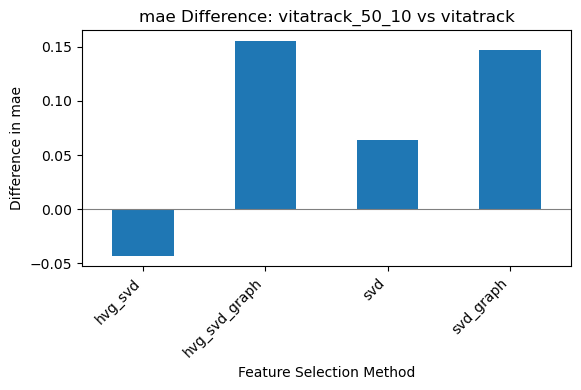


Difference (vitatrack_100_20 - vitatrack) for mae:
task           vitatrack_100_20_minus_vitatrack
featsel                                        
hvg_svd                               -0.010661
hvg_svd_graph                          0.240870
svd                                    0.082812
svd_graph                              0.191919


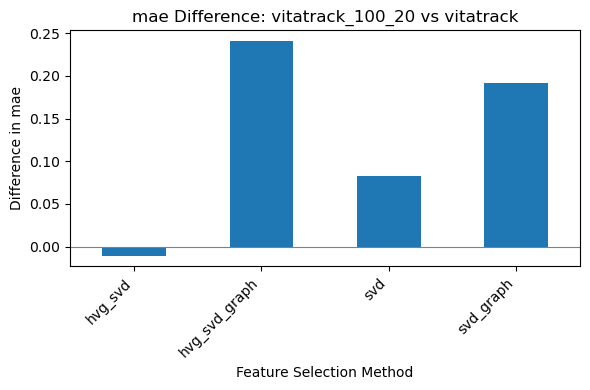


Pivot Table for r2:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd        -3.135983         -2.864788        -2.549451
hvg_svd_graph  -9.598612        -12.855391       -11.943303
svd            -1.689088         -2.554269        -2.260928
svd_graph      -9.728230        -12.136991       -11.796067


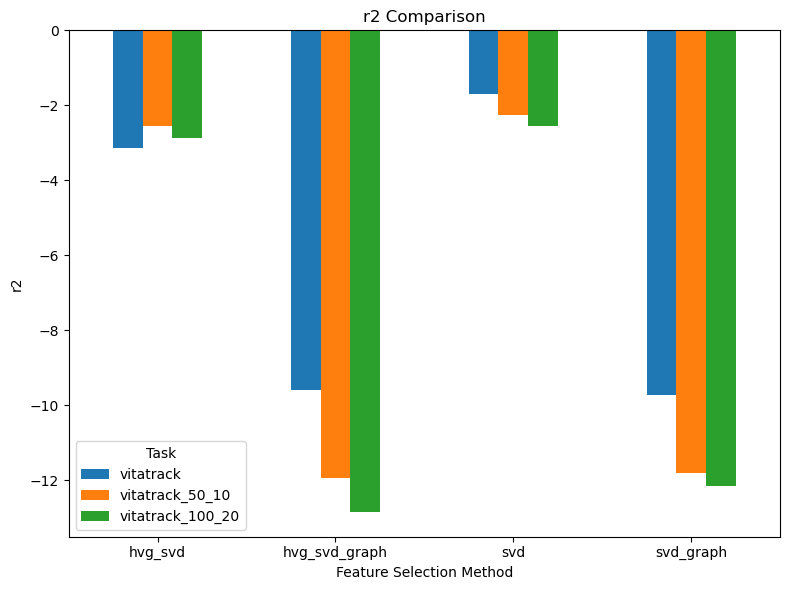


Difference (vitatrack_50_10 - vitatrack) for r2:
task           vitatrack_50_10_minus_vitatrack
featsel                                       
hvg_svd                               0.586532
hvg_svd_graph                        -2.344691
svd                                  -0.571839
svd_graph                            -2.067836


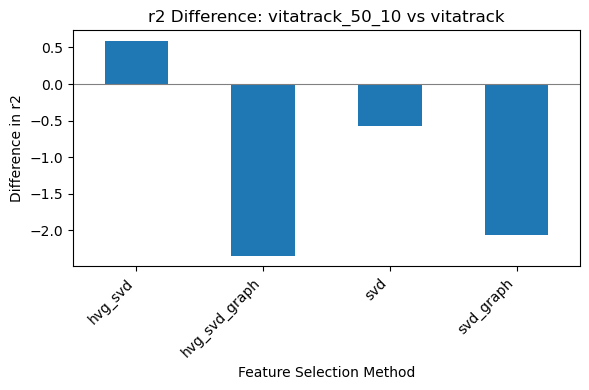


Difference (vitatrack_100_20 - vitatrack) for r2:
task           vitatrack_100_20_minus_vitatrack
featsel                                        
hvg_svd                                0.271195
hvg_svd_graph                         -3.256779
svd                                   -0.865181
svd_graph                             -2.408760


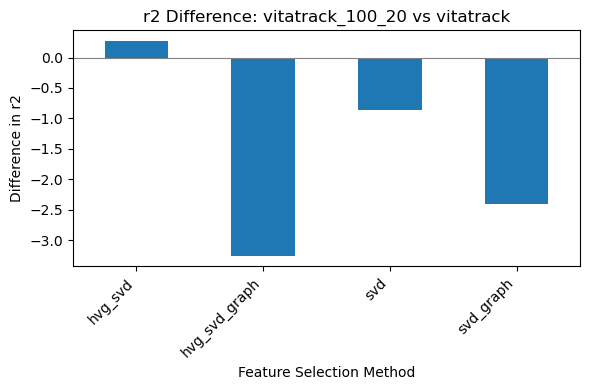


Pivot Table for pearson:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         0.812932          0.813855         0.817396
hvg_svd_graph   0.810742          0.785964         0.798022
svd             0.825418          0.817471         0.818005
svd_graph       0.810754          0.792479         0.793846


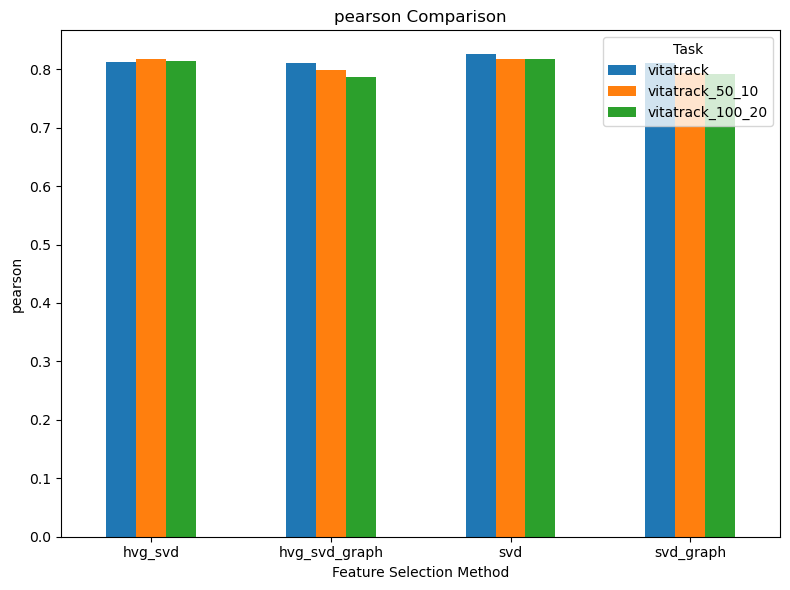


Difference (vitatrack_50_10 - vitatrack) for pearson:
task           vitatrack_50_10_minus_vitatrack
featsel                                       
hvg_svd                               0.004464
hvg_svd_graph                        -0.012720
svd                                  -0.007413
svd_graph                            -0.016909


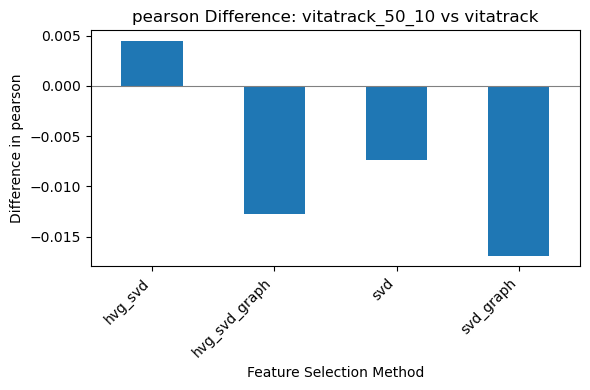


Difference (vitatrack_100_20 - vitatrack) for pearson:
task           vitatrack_100_20_minus_vitatrack
featsel                                        
hvg_svd                                0.000923
hvg_svd_graph                         -0.024777
svd                                   -0.007947
svd_graph                             -0.018276


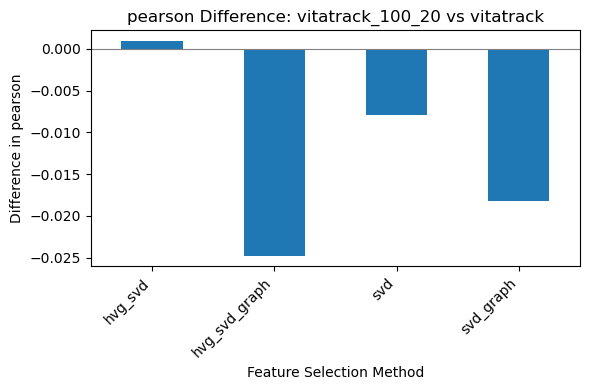


Pivot Table for spearman:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         0.867442          0.868263         0.871497
hvg_svd_graph   0.866050          0.844342         0.854694
svd             0.879874          0.871536         0.872528
svd_graph       0.866389          0.848805         0.850823


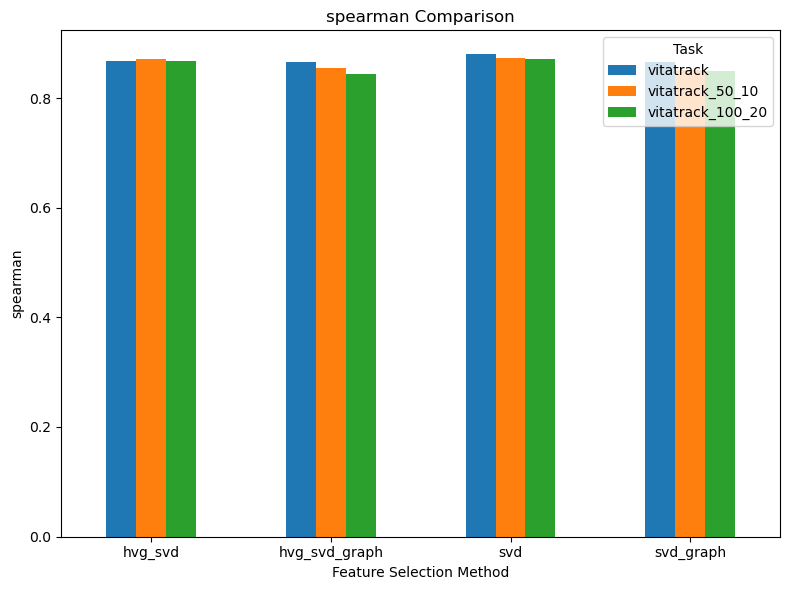


Difference (vitatrack_50_10 - vitatrack) for spearman:
task           vitatrack_50_10_minus_vitatrack
featsel                                       
hvg_svd                               0.004055
hvg_svd_graph                        -0.011356
svd                                  -0.007346
svd_graph                            -0.015566


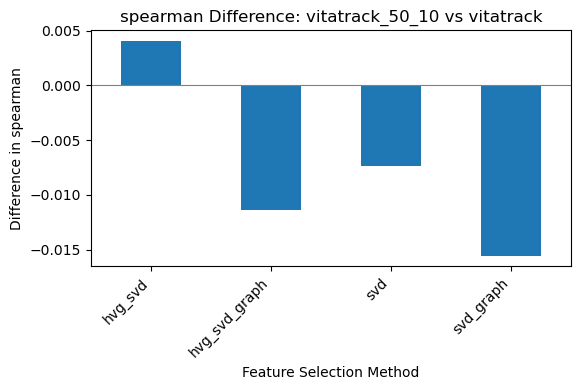


Difference (vitatrack_100_20 - vitatrack) for spearman:
task           vitatrack_100_20_minus_vitatrack
featsel                                        
hvg_svd                                0.000822
hvg_svd_graph                         -0.021707
svd                                   -0.008338
svd_graph                             -0.017584


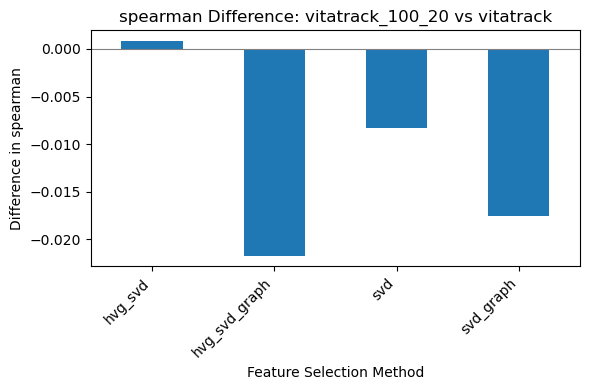

In [7]:
fs_col = "featsel"
metrics = ["rmse", "mae", "r2", "pearson", "spearman"]
base_task = "vitatrack"

# Define the tasks to compare against the base
comparison_tasks = ["vitatrack_50_10", "vitatrack_100_20"]

for metric in metrics:
    if metric in df_filtered.columns:
        pivot_table = df_filtered.pivot_table(index=fs_col, 
                                              columns="task", 
                                              values=metric, 
                                              aggfunc='mean')
        print(f"\nPivot Table for {metric}:")
        print(pivot_table)

        if base_task not in pivot_table.columns:
            print(f"Base task '{base_task}' missing in pivot table for {metric}. Skipping.")
            continue

        # Plot original task values (base + available comparisons)
        plot_columns = [base_task] + [task for task in comparison_tasks if task in pivot_table.columns]
        pivot_table[plot_columns].plot(kind="bar", figsize=(8, 6), title=f"{metric} Comparison")
        plt.xlabel("Feature Selection Method")
        plt.ylabel(metric)
        plt.legend(title="Task")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

        # Compute and plot differences
        for comp_task in comparison_tasks:
            if comp_task in pivot_table.columns:
                diff_col = f"{comp_task}_minus_{base_task}"
                pivot_table[diff_col] = pivot_table[comp_task] - pivot_table[base_task]
                print(f"\nDifference ({comp_task} - {base_task}) for {metric}:")
                print(pivot_table[[diff_col]])

                # Plot difference
                pivot_table[diff_col].plot(kind="bar", figsize=(6, 4), title=f"{metric} Difference: {comp_task} vs {base_task}")
                plt.xlabel("Feature Selection Method")
                plt.ylabel(f"Difference in {metric}")
                plt.axhline(0, color="gray", linewidth=0.8)
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout()
                plt.show()
            else:
                print(f"Comparison task '{comp_task}' missing for {metric}.")
    else:
        print(f"Metric '{metric}' not found in the DataFrame.")



Pivot Table for rmse:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         3.246548          3.228349         3.191940
hvg_svd_graph   3.324444          3.546879         3.448809
svd             3.105657          3.196284         3.184154
svd_graph       3.326741          3.501385         3.474542


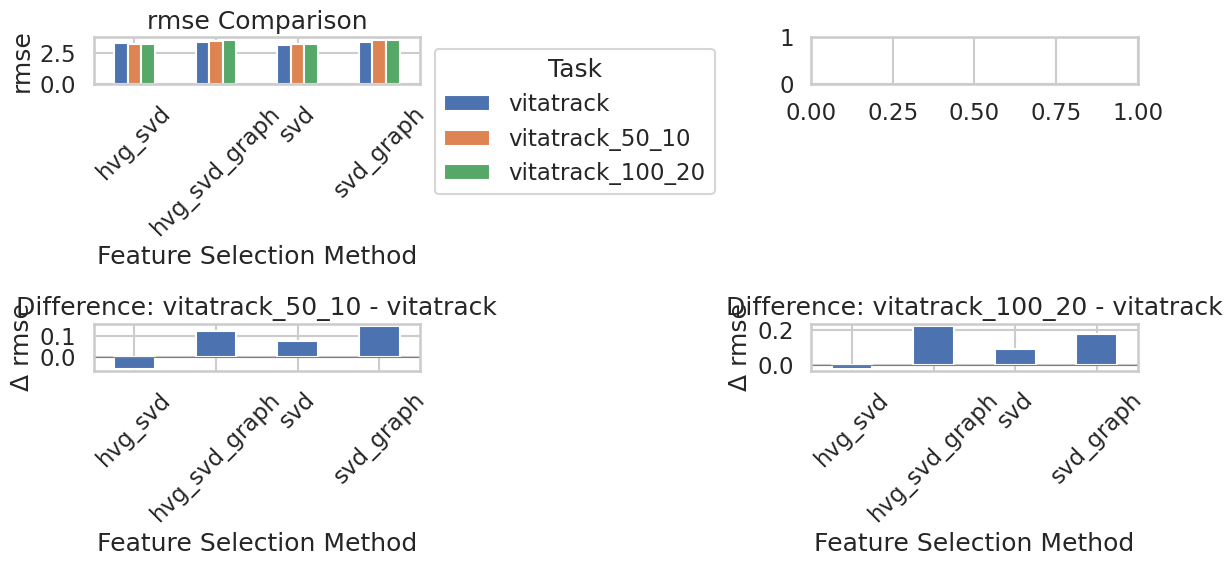


Pivot Table for mae:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         2.357430          2.346768         2.314549
hvg_svd_graph   2.472309          2.713179         2.627639
svd             2.237845          2.320656         2.301567
svd_graph       2.484704          2.676623         2.631460


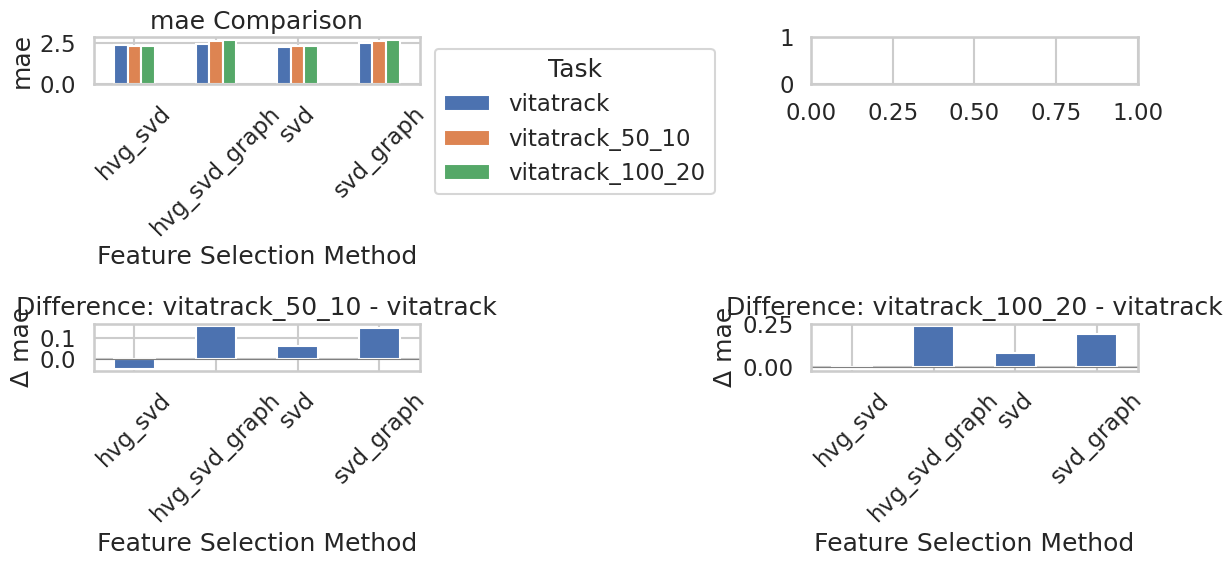


Pivot Table for r2:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd        -3.135983         -2.864788        -2.549451
hvg_svd_graph  -9.598612        -12.855391       -11.943303
svd            -1.689088         -2.554269        -2.260928
svd_graph      -9.728230        -12.136991       -11.796067


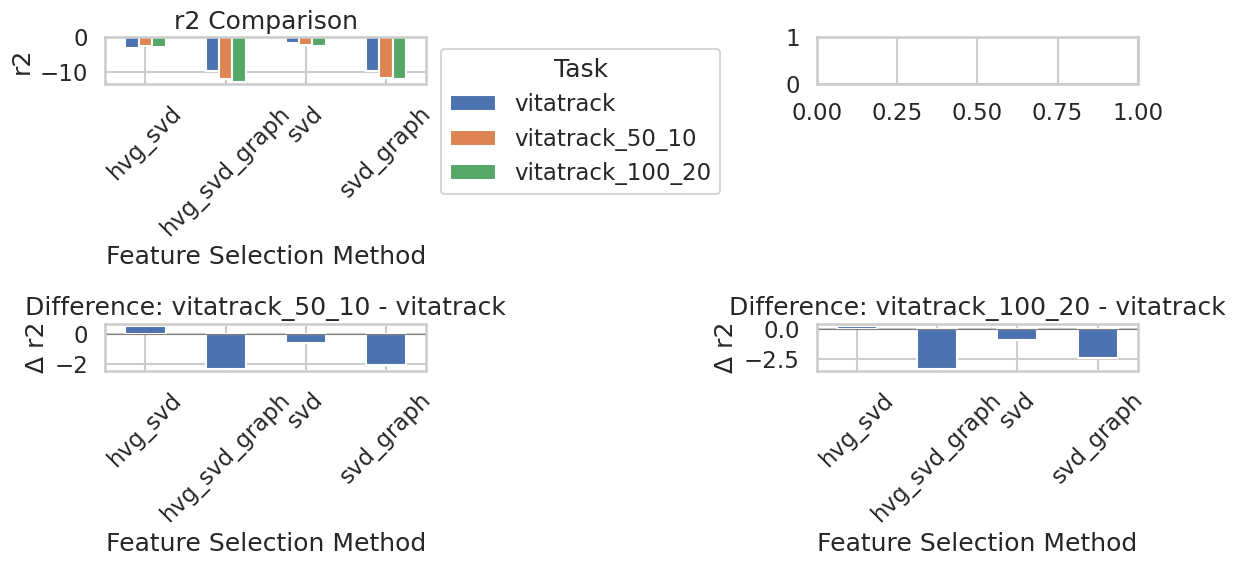


Pivot Table for pearson:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         0.812932          0.813855         0.817396
hvg_svd_graph   0.810742          0.785964         0.798022
svd             0.825418          0.817471         0.818005
svd_graph       0.810754          0.792479         0.793846


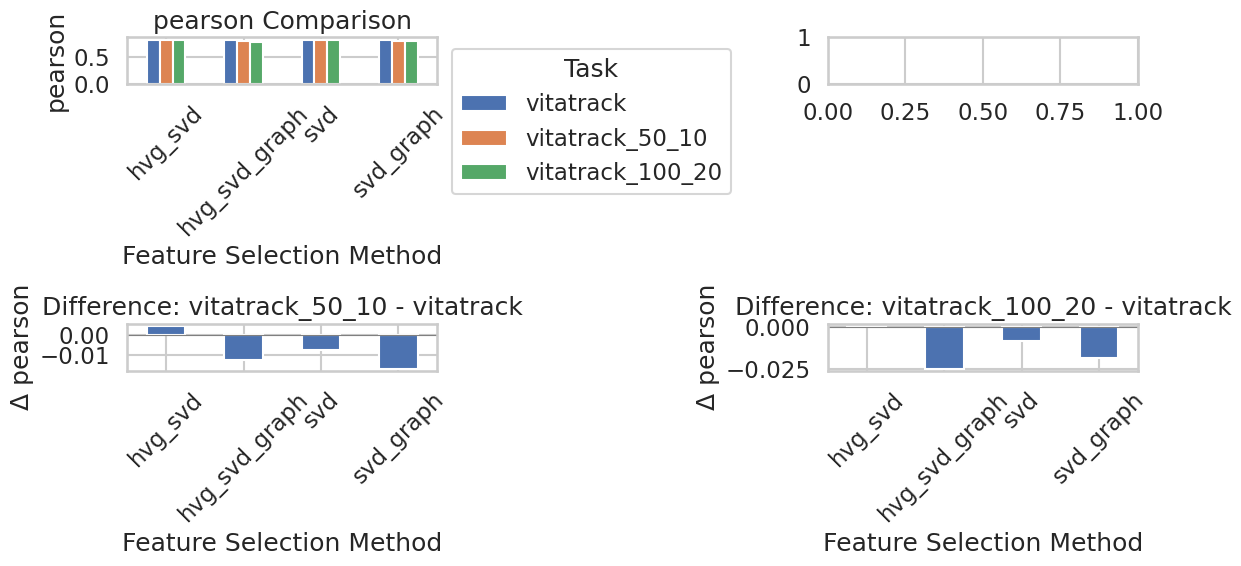


Pivot Table for spearman:
task           vitatrack  vitatrack_100_20  vitatrack_50_10
featsel                                                    
hvg_svd         0.867442          0.868263         0.871497
hvg_svd_graph   0.866050          0.844342         0.854694
svd             0.879874          0.871536         0.872528
svd_graph       0.866389          0.848805         0.850823


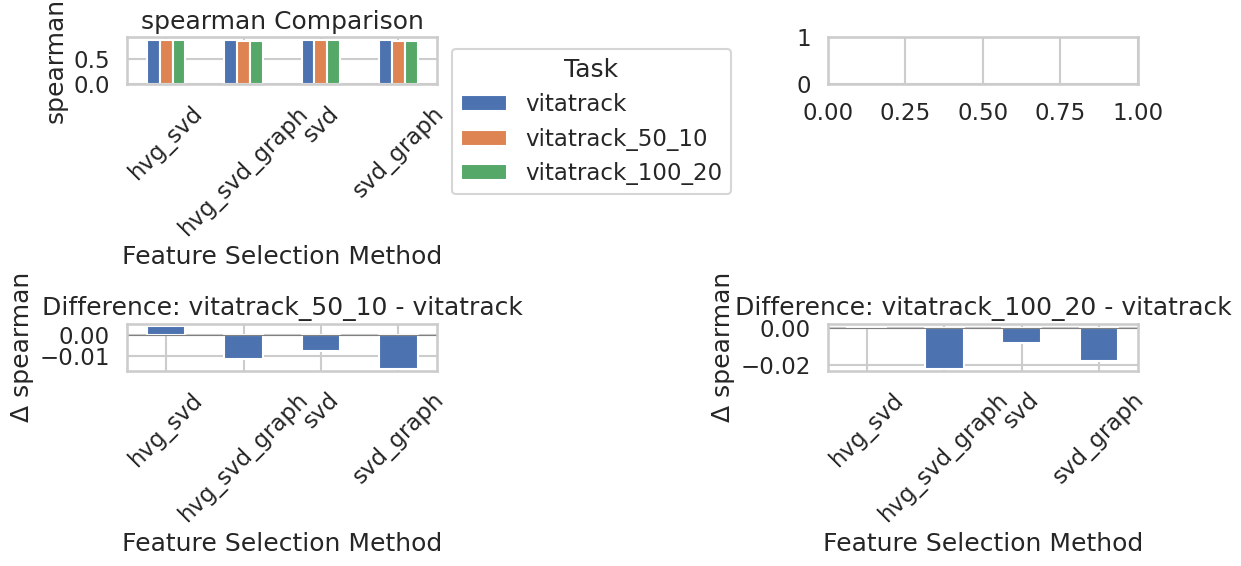

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fs_col = "featsel"
metrics = ["rmse", "mae", "r2", "pearson", "spearman"]
base_task = "vitatrack"
comparison_tasks = ["vitatrack_50_10", "vitatrack_100_20"]

for metric in metrics:
    if metric in df_filtered.columns:
        pivot_table = df_filtered.pivot_table(index=fs_col, 
                                              columns="task", 
                                              values=metric, 
                                              aggfunc='mean')
        print(f"\nPivot Table for {metric}:")
        print(pivot_table)

        if base_task not in pivot_table.columns:
            print(f"Base task '{base_task}' missing in pivot table for {metric}. Skipping.")
            continue

        # Collect available tasks and compute differences
        plot_columns = [base_task] + [task for task in comparison_tasks if task in pivot_table.columns]
        diff_data = {}
        for comp_task in comparison_tasks:
            if comp_task in pivot_table.columns:
                diff_col = f"{comp_task} - {base_task}"
                pivot_table[diff_col] = pivot_table[comp_task] - pivot_table[base_task]
                diff_data[diff_col] = pivot_table[diff_col]

        n_diffs = len(diff_data)
        nrows = 2 if n_diffs > 0 else 1
        ncols = max(1, n_diffs)

        # Create figure and axes grid
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6))
        axs = np.array(axs).reshape(nrows, ncols)  # Force 2D shape

        # --- Top plot: all metric values ---
        ax_main = axs[0, 0]
        pivot_table[plot_columns].plot(kind="bar", ax=ax_main, title=f"{metric} Comparison")
        ax_main.set_xlabel("Feature Selection Method")
        ax_main.set_ylabel(metric)
        ax_main.tick_params(axis="x", rotation=45)
        ax_main.legend(title="Task", bbox_to_anchor=(1.01, 1), loc='upper left')

        # --- Bottom plots: differences ---
        for i, (diff_label, diff_series) in enumerate(diff_data.items()):
            ax_diff = axs[1, i] if n_diffs > 1 else axs[1, 0]
            diff_series.plot(kind="bar", ax=ax_diff, title=f"Difference: {diff_label}")
            ax_diff.axhline(0, color="gray", linewidth=0.8)
            ax_diff.set_xlabel("Feature Selection Method")
            ax_diff.set_ylabel(f"Δ {metric}")
            ax_diff.tick_params(axis="x", rotation=45)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Metric '{metric}' not found in the DataFrame.")



Pivot Table for rmse:
task           vitatrack  vitatrack_50_10
featsel                                  
hvg_svd         3.246548         3.191940
hvg_svd_graph   3.324444         3.448809
svd             3.105657         3.184154
svd_graph       3.326741         3.474542

Difference (vitatrack_50_10 minus vitatrack) for rmse:
task           Difference
featsel                  
hvg_svd         -0.054608
hvg_svd_graph    0.124364
svd              0.078497
svd_graph        0.147802


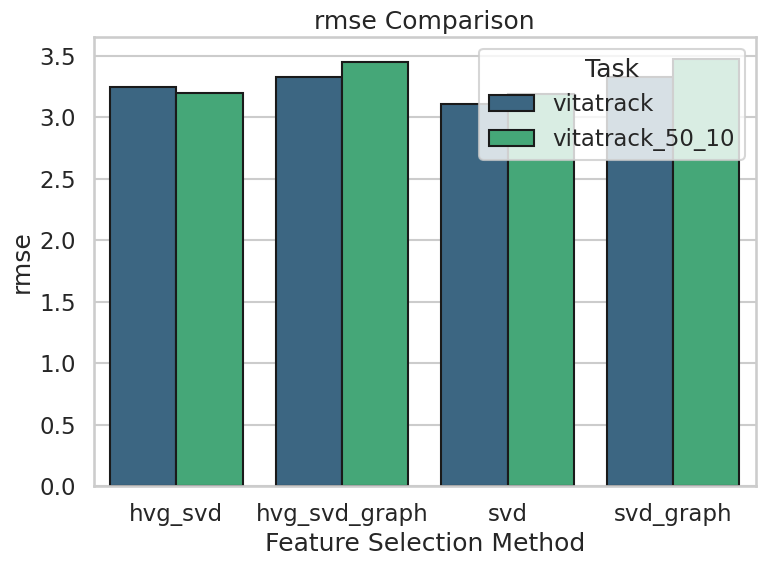

/tmp/ipykernel_1703956/1216844263.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_diff = sns.barplot(data=diff_df, x=fs_col, y="Difference", palette="magma", edgecolor="0.1")


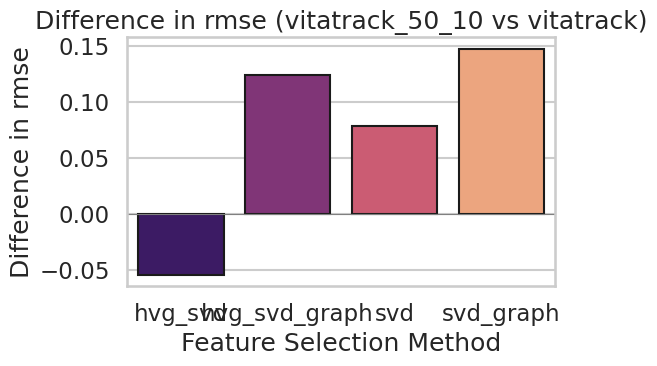


Pivot Table for mae:
task           vitatrack  vitatrack_50_10
featsel                                  
hvg_svd         2.357430         2.314549
hvg_svd_graph   2.472309         2.627639
svd             2.237845         2.301567
svd_graph       2.484704         2.631460

Difference (vitatrack_50_10 minus vitatrack) for mae:
task           Difference
featsel                  
hvg_svd         -0.042881
hvg_svd_graph    0.155330
svd              0.063722
svd_graph        0.146756


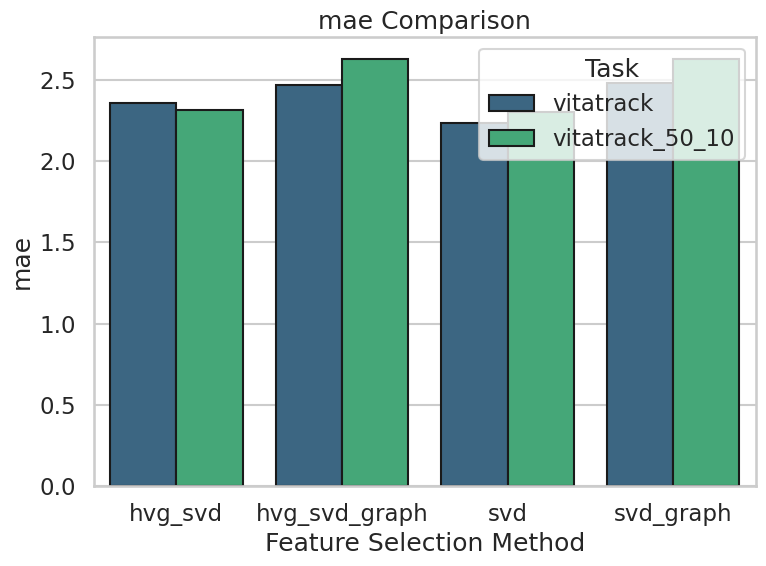

/tmp/ipykernel_1703956/1216844263.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_diff = sns.barplot(data=diff_df, x=fs_col, y="Difference", palette="magma", edgecolor="0.1")


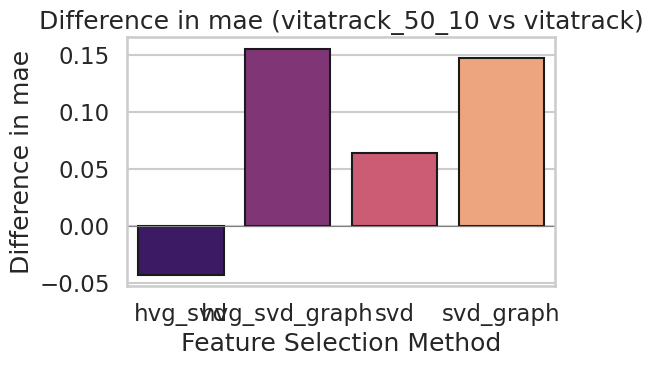


Pivot Table for r2:
task           vitatrack  vitatrack_50_10
featsel                                  
hvg_svd        -3.135983        -2.549451
hvg_svd_graph  -9.598612       -11.943303
svd            -1.689088        -2.260928
svd_graph      -9.728230       -11.796067

Difference (vitatrack_50_10 minus vitatrack) for r2:
task           Difference
featsel                  
hvg_svd          0.586532
hvg_svd_graph   -2.344691
svd             -0.571839
svd_graph       -2.067836


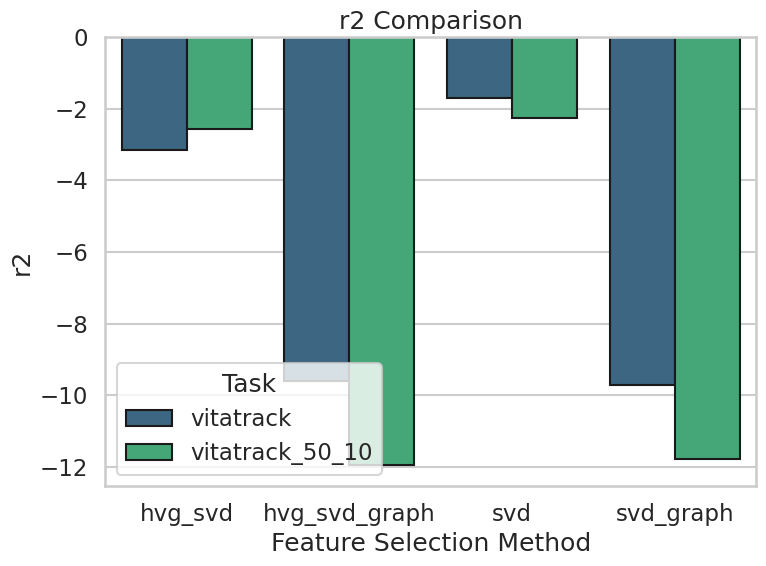

/tmp/ipykernel_1703956/1216844263.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_diff = sns.barplot(data=diff_df, x=fs_col, y="Difference", palette="magma", edgecolor="0.1")


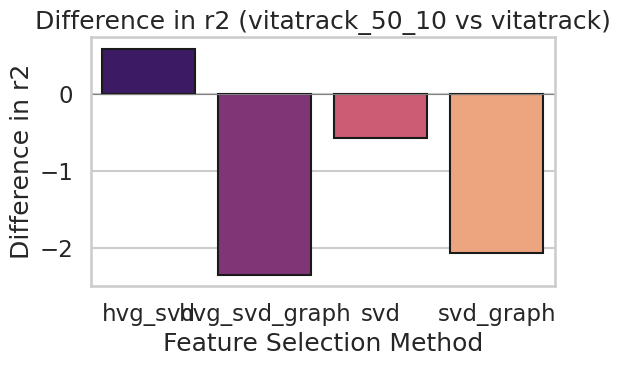


Pivot Table for pearson:
task           vitatrack  vitatrack_50_10
featsel                                  
hvg_svd         0.812932         0.817396
hvg_svd_graph   0.810742         0.798022
svd             0.825418         0.818005
svd_graph       0.810754         0.793846

Difference (vitatrack_50_10 minus vitatrack) for pearson:
task           Difference
featsel                  
hvg_svd          0.004464
hvg_svd_graph   -0.012720
svd             -0.007413
svd_graph       -0.016909


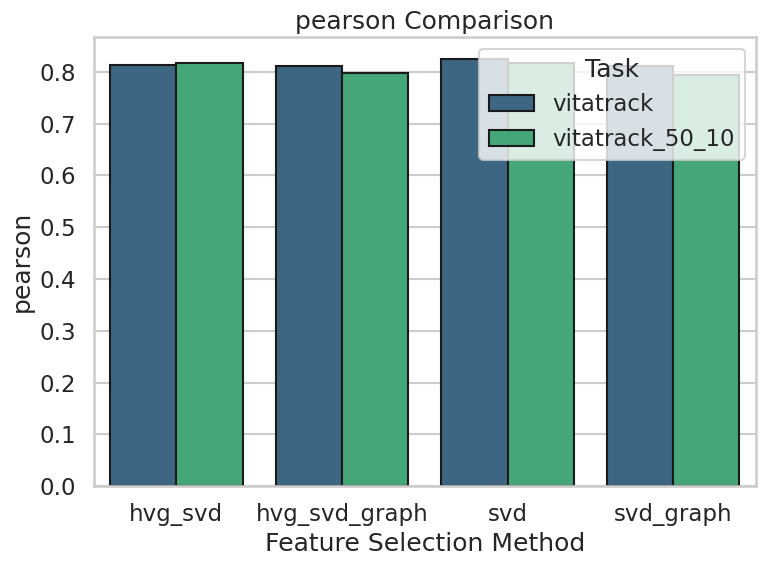

/tmp/ipykernel_1703956/1216844263.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_diff = sns.barplot(data=diff_df, x=fs_col, y="Difference", palette="magma", edgecolor="0.1")


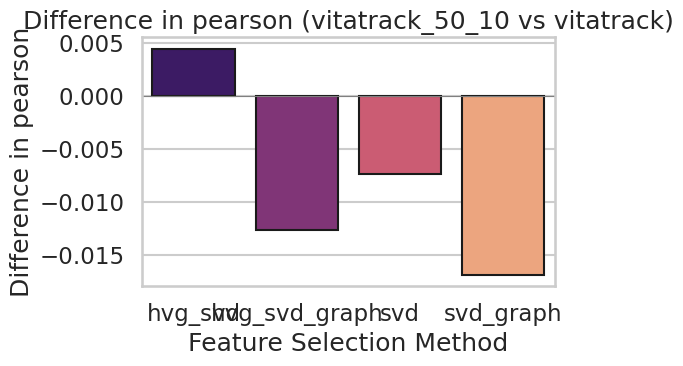


Pivot Table for spearman:
task           vitatrack  vitatrack_50_10
featsel                                  
hvg_svd         0.867442         0.871497
hvg_svd_graph   0.866050         0.854694
svd             0.879874         0.872528
svd_graph       0.866389         0.850823

Difference (vitatrack_50_10 minus vitatrack) for spearman:
task           Difference
featsel                  
hvg_svd          0.004055
hvg_svd_graph   -0.011356
svd             -0.007346
svd_graph       -0.015566


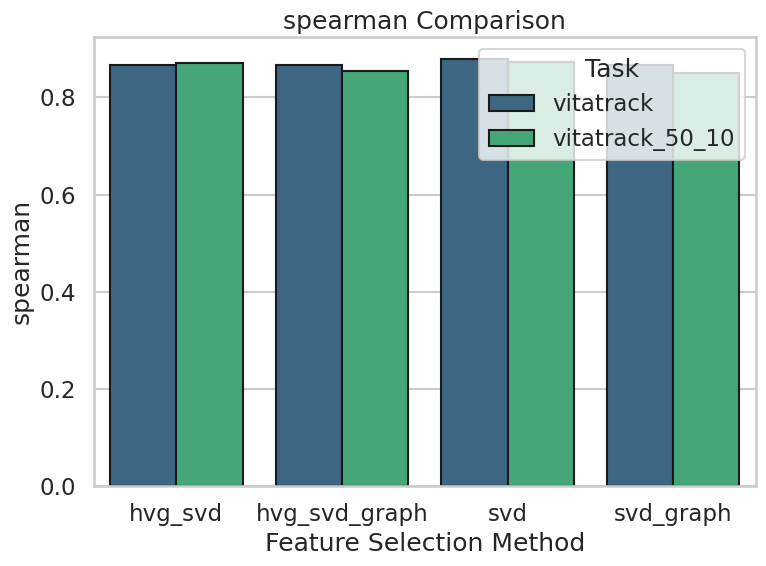

/tmp/ipykernel_1703956/1216844263.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_diff = sns.barplot(data=diff_df, x=fs_col, y="Difference", palette="magma", edgecolor="0.1")


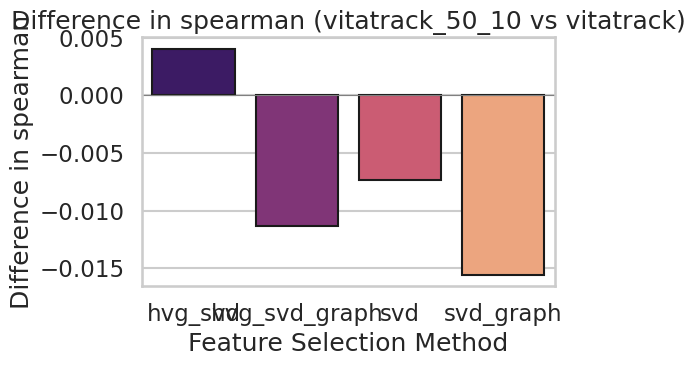

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for improved visuals
sns.set_theme(style="whitegrid", context="talk")

fs_col = "featsel"

# Define the list of performance metrics you want to compare
metrics = ["rmse", "mae", "r2", "pearson", "spearman"]

# Iterate over each metric
for metric in metrics:
    if metric in df_filtered.columns:
        # Create a pivot table aggregating duplicate rows by the mean
        pivot_table = df_filtered.pivot_table(index=fs_col, 
                                              columns="task", 
                                              values=metric, 
                                              aggfunc='mean')
        print(f"\nPivot Table for {metric}:")
        print(pivot_table)
        
        # Define the tasks we expect
        tasks_needed = ["vitatrack", "vitatrack_50_10"]
        if all(task in pivot_table.columns for task in tasks_needed):
            # Compute the difference (vitatrack_50_10 minus vitatrack)
            pivot_table["Difference"] = pivot_table["vitatrack_50_10"] - pivot_table["vitatrack"]
            print(f"\nDifference (vitatrack_50_10 minus vitatrack) for {metric}:")
            print(pivot_table[["Difference"]])
        else:
            print(f"One or more tasks {tasks_needed} are missing in the pivot table for {metric}.")
        
        # ---- Plot the grouped bar chart using Seaborn for tasks ----
        # We'll drop the "Difference" column and convert the table to long format.
        pivot_no_diff = pivot_table.drop(columns="Difference", errors='ignore').reset_index()
        pivot_long = pivot_no_diff.melt(id_vars=fs_col, var_name="Task", value_name=metric)
        
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(data=pivot_long, x=fs_col, y=metric, hue="Task", palette="viridis", edgecolor="0.1")
        ax.set_title(f"{metric} Comparison")
        ax.set_xlabel("Feature Selection Method")
        ax.set_ylabel(metric)
        plt.legend(title="Task")
        plt.tight_layout()
        plt.show()
        
        # ---- Plot the differences using Seaborn ----
        if "Difference" in pivot_table.columns:
            diff_df = pivot_table["Difference"].reset_index()
            plt.figure(figsize=(6, 4))
            ax_diff = sns.barplot(data=diff_df, x=fs_col, y="Difference", palette="magma", edgecolor="0.1")
            ax_diff.set_title(f"Difference in {metric} (vitatrack_50_10 vs vitatrack)")
            ax_diff.set_xlabel("Feature Selection Method")
            ax_diff.set_ylabel(f"Difference in {metric}")
            plt.axhline(0, color="gray", linewidth=0.8)  # horizontal line at 0
            plt.tight_layout()
            plt.show()
    else:
        print(f"Metric '{metric}' not found in the DataFrame.")
